# パイプラインを用いたグリッドサーチ

パイプラインをグリットサーチで用いる方法は他のEstimatorを用いる場合と全く同じである．サーチするパラメータグリッドを定義し，パイプラインとパラメータグリッドをもいいてGridSearchCVをつくる．
ただし，パラメータグリッドを定義する際には，パイプラインのどのステップに属するかを指定する必要がある．命名方法は「(ステップ名)__(パラメータ名)」で指定を行う．

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mglearn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

ここのパラメータにはパイプラインのどのステップに属するか指定する必要がある。SVCのCパラメータに対してサーチするには"svm__C"をディクショナリのキーにする。

In [6]:
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [7]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__gamma': 1, 'svm__C': 1}


以前の行ったグリッドサーチ(parameter_selection_with_preprocessing)とは違い、交差検証の個々の分割に対して、学習用のパートのみを対象にMinMaxScalerをfitし直すので、テスト用のパートから情報がパラメータサーチに漏れることはない。    

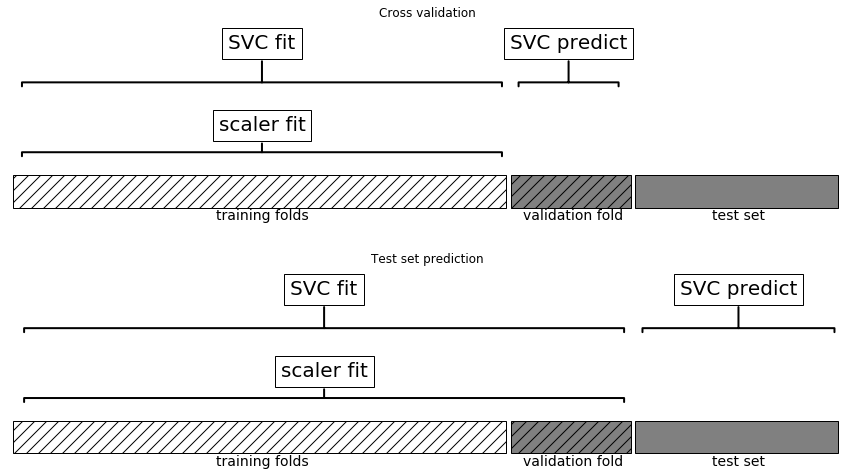

In [14]:
mglearn.plots.plot_proper_processing()
plt.show()

交差検定で情報がリークするのは前処理ステップの性質に依存する．スケールはテストデータを用いて推定してもあまり影響は出ないが．特徴量抽出や特徴量選択をテストデータで行うと結果に大きく影響が出る．